In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import time
import os

resnet = ResNet50(weights='imagenet')

In [15]:
images_dir = os.path.join(os.getcwd(), 'test_images_1')
images_names = os.listdir(images_dir)
images_pathes = [os.path.join(images_dir, images_names[i]) for i in range(len(images_names))]

In [16]:
images_inp = []
for i in range(len(images_pathes)):
    image_inp = load_img(images_pathes[i], target_size=(224, 224))
    image_inp = np.array(image_inp)
    images_inp.append(image_inp)
images_inp = np.array(images_inp)

In [17]:
images_inp.shape

(100, 224, 224, 3)

In [18]:
model = resnet
images_inp = preprocess_input(images_inp)
start_time = time.time()
images_attributes = model.predict(images_inp)
print('Output shape: {}, Passed time: {}s'.format(images_attributes.shape, time.time()-start_time))

Output shape: (100, 1000), Passed time: 4.734344244003296s


Decoded objects: : [('n09246464', 'cliff', 0.49920115), ('n09468604', 'valley', 0.26965246), ('n03160309', 'dam', 0.08338567)]


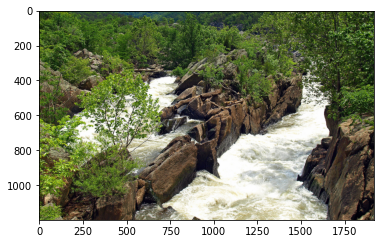

In [19]:
ind = 10
plt.imshow(np.array(Image.open(images_pathes[ind])))
print('Decoded objects: :', decode_predictions(np.array([images_attributes[ind]]), top=3)[0])

In [20]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [21]:
layer_name = 'avg_pool' 
intermediate_layer_model = Model(inputs=resnet.input,
                                 outputs=resnet.get_layer(layer_name).output)

In [22]:
model = intermediate_layer_model
images_inp = preprocess_input(images_inp)
start_time = time.time()
images_attributes = model.predict(images_inp)
print('Output shape: {}, Passed time: {}s'.format(images_attributes.shape, time.time()-start_time))

Output shape: (100, 2048), Passed time: 5.241746187210083s


In [25]:
kmeans = KMeans(n_clusters=2)
start_time = time.time()
kmeans.fit(images_attributes)
model_lables = kmeans.labels_
print('Output shape: {}, Passed time: {}s'.format(model_lables.shape, time.time()-start_time))
print('Unique values: {}'.format(np.unique(model_lables)))

Output shape: (100,), Passed time: 0.0800178050994873s
Unique values: [0 1]


In [26]:
categories_dir = os.path.join(os.getcwd(), 'test_categories')
if not os.path.exists(categories_dir): os.mkdir(categories_dir)

for i in range(len(images_pathes)):
    categorie_dir = os.path.join(categories_dir, 'categorie_{}'.format(str(model_lables[i])))
    if not os.path.exists(categorie_dir): os.mkdir(categorie_dir)
    (Image.open(images_pathes[i])).save(os.path.join(categorie_dir, images_names[i]))
